In [16]:
# All of your imports here (you may need to add some)
import numpy
import scipy
import pandas
from pandas import read_csv
import matplotlib.pylab as plot
import seaborn
import kagglehub
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(transform_output = "pandas")

# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Frame the Problem and Look at the Big Picture
=====================================
1. **Define the objective in business terms:** Predict if there will be a 5 day avg air above 40(max) above 32(min) and soil above 50 on or before april 1st
purchase before feb 25
2. **How will your solution be used?** We will make a prediction on feb 24
3. **How should you frame this problem?** <mark>
4. **How should performance be measured? Is the performance measure aligned with the business objective?** 
5. **What would be the minimum performance needed to reach the business objective?** 
6. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?** 
7. **Is human expertise available?**
8. **How would you solve the problem manually?** 
9. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** 

# Get the Data

1. **List the data you need and how much you need:**
2. **Find and document where you can get that data:**
- https://www.kaggle.com/datasets/groundhogclub/groundhog-day

3. **Get access authorizations**: None needed, publicy available.
- 

4. **Create a workspace**: This notebook.
5. **Get the data**: 
6. **Convert the data to a format you can easily manipulate**:
7. **Ensure sensitive information is deleted or protected**: 
8. **Check the size and type of data (time series, geographical, …)**: : 
   1. .

Do not look at the data too closely at this point since you have not yet split off the testing set. Basically, enough looking at it to understand *how* to split the test set off. It is likely you will have to review the website where the data came from to be able to understand some of the features.

In [17]:
# Download latest version
path = kagglehub.dataset_download("groundhogclub/groundhog-day")

ground_hog = read_csv("archive.csv")


In [15]:
ground_hog["February Average Temperature (Pennsylvania)"].tail()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: February Average Temperature, dtype: float64

In [26]:
#Drop NaN Values(Using February Average Temp because it has the most NaN values)
ground_hog = ground_hog.dropna(subset=["February Average Temperature"])
ground_hog = ground_hog.dropna(subset=["Punxsutawney Phil"])

# Display the value counts for the new column
ground_hog["Extended Winter/Spring"].value_counts()


Extended Winter/Spring
Extended Winter    107
Spring              15
Name: count, dtype: int64

<Axes: xlabel='Extended Winter/Spring'>

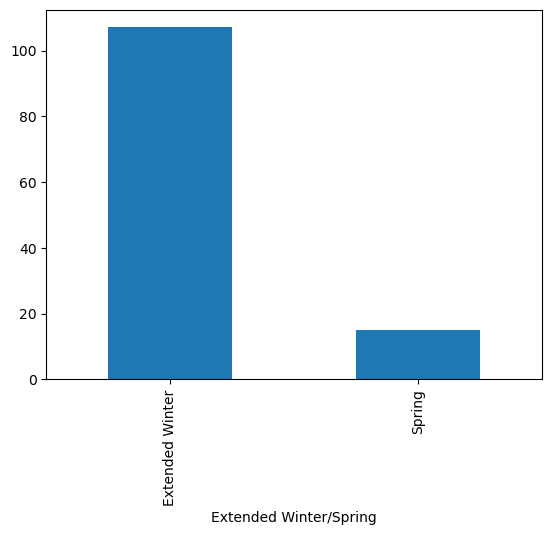

In [42]:
ground_hog["Extended Winter/Spring"].value_counts().plot(kind="bar")

In [27]:
ground_hog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 9 to 130
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         122 non-null    object 
 1   Punxsutawney Phil                            122 non-null    object 
 2   February Average Temperature                 122 non-null    float64
 3   February Average Temperature (Northeast)     122 non-null    float64
 4   February Average Temperature (Midwest)       122 non-null    float64
 5   February Average Temperature (Pennsylvania)  122 non-null    float64
 6   March Average Temperature                    122 non-null    float64
 7   March Average Temperature (Northeast)        122 non-null    float64
 8   March Average Temperature (Midwest)          122 non-null    float64
 9   March Average Temperature (Pennsylvania)     122 non-null    float64
dtypes: floa

In [40]:
train_set, test_set = train_test_split(ground_hog, test_size=0.10, random_state=42) 
